In [ ]:
import logging

from sklearn.metrics import accuracy_score

from ekf.ekf import EKFConfig, EKFSkillModel, Matches
from ekf import tennis_data

logging.basicConfig(level=logging.INFO)

In [20]:
matches_df = tennis_data.load_historical_matches(from_year=1995, to_year=2025)

Loaded 95060 matches from 1995 to 2025


In [21]:
matches = Matches.from_pandas(matches_df)

In [ ]:
config = EKFConfig(
    sigma_match=3.0,
    lambda_decay=0.02,
    sigma_skill=0.05,
    sigma_momentum=0.05,
    default_skill=0.0,
    default_skill_var=3.0,
    default_momentum=0.0,
    default_momentum_var=2.0,
    default_covariance=0.0
)
ekf = EKFSkillModel(config)

In [23]:
history = ekf.fit(matches)

INFO:ekf.ekf:Fitting 95060 matches completed in 7.96 seconds


In [24]:
pred_df = ekf.predict_dataframe(matches_df)

In [25]:
y_true = (pred_df.winner == pred_df.player1).astype(int)
y_pred = (pred_df.pred_proba >= 0.5).astype(int)
y_pred_rank = (pred_df.player1_rank < pred_df.player2_rank).astype(int)

In [26]:
# prediction accuracy based on official ATP rankings
accuracy_score(y_true, y_pred_rank)

0.6484220492320639

In [27]:
# EKF's accuracy based on modelled latent skill
accuracy_score(y_true, y_pred)

0.6570271407532084

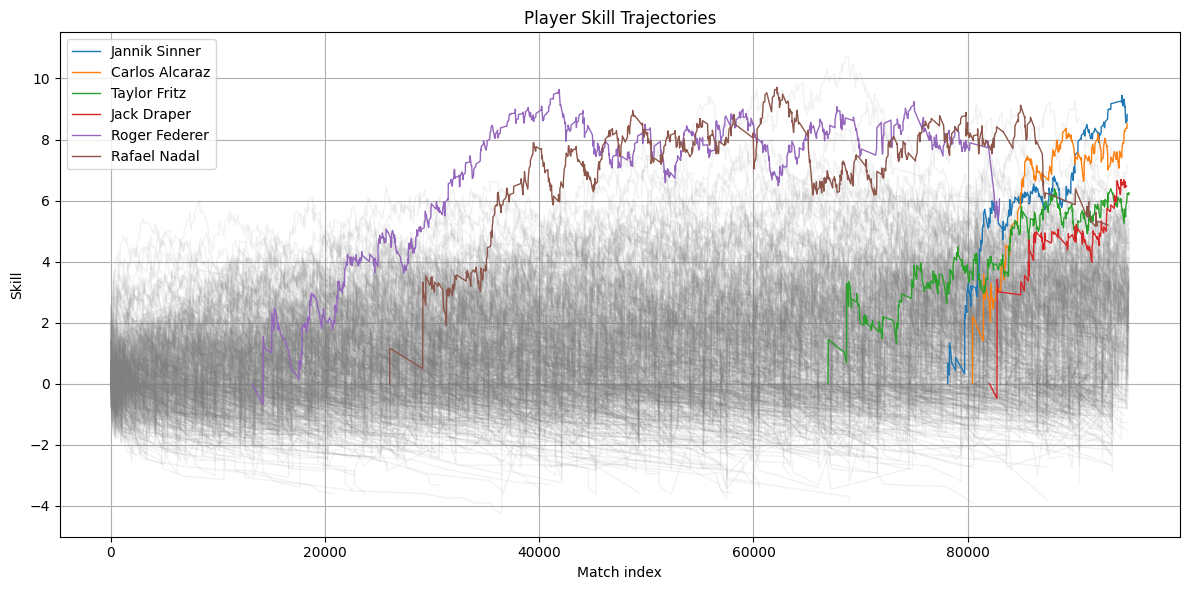

In [28]:
player_ids = [
    "Jannik Sinner",
    "Carlos Alcaraz",
    "Taylor Fritz",
    "Jack Draper",
    "Roger Federer",
    "Rafael Nadal",
]

history.plot_history(player_ids)

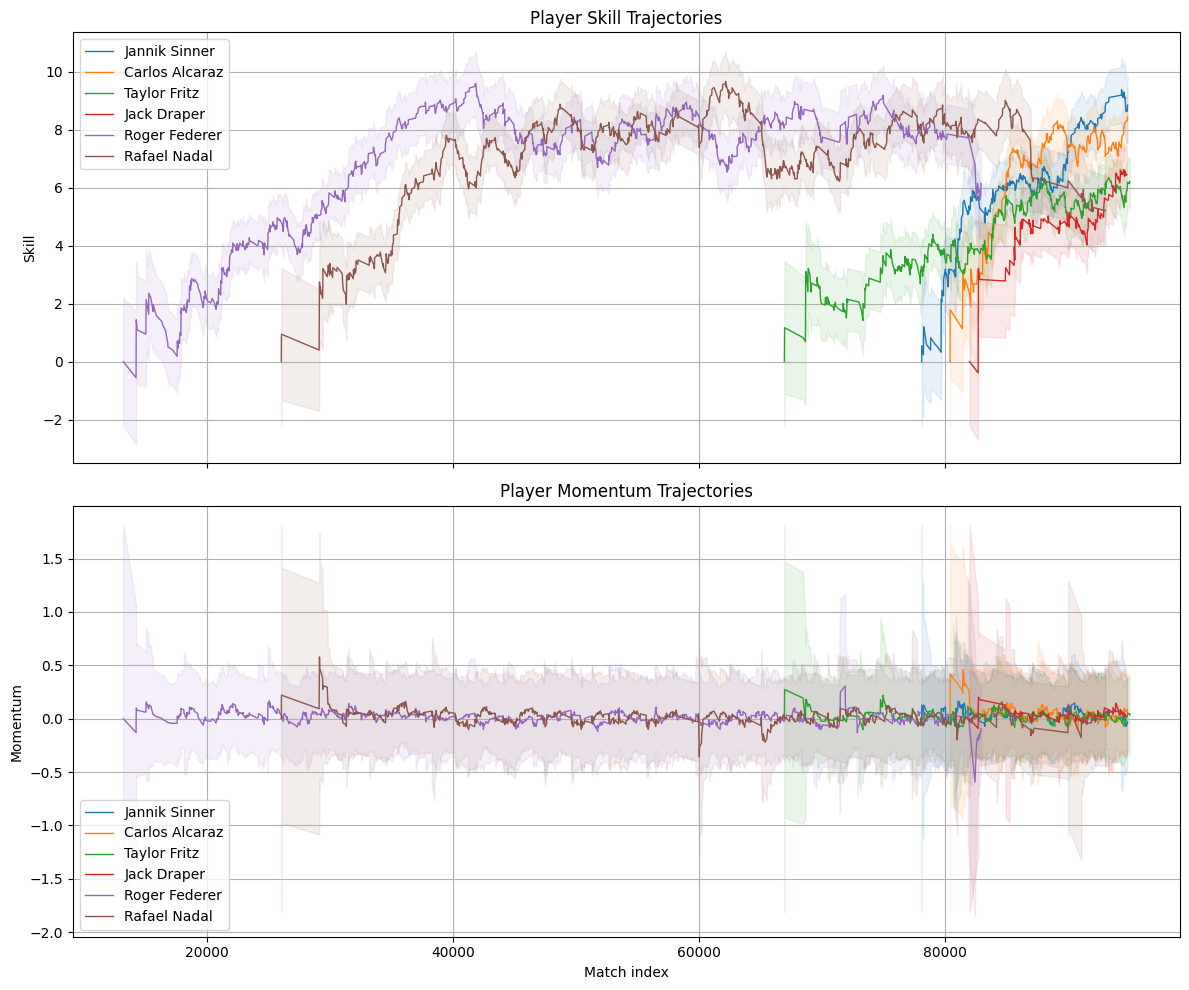

In [29]:
history.plot_history(player_ids, show="decomposed", confidence=0.8, show_all=False)